In [38]:
!pip install textblob
!pip install wordcloud

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\SONY\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\SONY\\AppData\\Local\\Temp\\pip-install-2c1v9cqj\\wordcloud_28a1d2d1f7e24e09b230c0725912ccc4\\setup.py'"'"'; __file__='"'"'C:\\Users\\SONY\\AppData\\Local\\Temp\\pip-install-2c1v9cqj\\wordcloud_28a1d2d1f7e24e09b230c0725912ccc4\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\SONY\AppData\Local\Temp\pip-wheel-c0c_ja82'
       cwd: C:\Users\SONY\AppData\Local\Temp\pip-install-2c1v9cqj\wordcloud_28a1d2d1f7e24e09b230c0725912ccc4\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  cr


  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


    running install
    running build
    running build_py
    creating build
    creating build\lib.win-amd64-3.9
    creating build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\tokenization.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\_version.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\__init__.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\__main__.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\stopwords -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.9\wordcloud
    UPDATING build\lib.win-amd64-3.9\wordcloud/_version.py
    set build\lib.win-amd64-3.9\wordcloud/_version.py to '1.8.1'
    running build_ext
    building 'wordcloud.query_i

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import re
from textblob import TextBlob
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
# from wordcloud import WordCloud
%matplotlib inline

In [27]:
tweets=pd.read_csv("C:\\Users\\SONY\\Downloads\\Elon_musk.csv",encoding='Latin')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [32]:
# clean the test
def clean_text(text):
    text=re.sub(r'@[A-Za-z0-9+]','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\s+','',text)
    return text

tweets['Text']=tweets['Text'].apply(clean_text)
tweets

,Unnamed: 0,Text
0,1,unalb11 Im an alien
1,2,D_AA_Carmack Ray tracing on Cyberpunk with HDR...
2,3,oerogan potify Great interview!
3,4,tera27 Doge is underestimated
4,5,eslacn Congratulations Tesla China for amazing...
...,...,...
1994,1995,"lcnhvy True, it sounds so surreal, but the neg..."
1995,1996,Pathole Make sure to read ur terms &amp; condi...
1996,1997,eslaGong Pathole Samwise Gamgee
1997,1998,Pathole Altho Dumb and Dumber is <U+0001F525><...


In [40]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

tweets['subjectivity']=tweets['Text'].apply(getsubjectivity)
tweets['polarity']=tweets['Text'].apply(getpolarity)

tweets

,Unnamed: 0,Text,subjectivity,polarity
0,1,unalb11 Im an alien,0.750000,-0.250000
1,2,D_AA_Carmack Ray tracing on Cyberpunk with HDR...,0.000000,0.000000
2,3,oerogan potify Great interview!,0.750000,1.000000
3,4,tera27 Doge is underestimated,0.000000,0.000000
4,5,eslacn Congratulations Tesla China for amazing...,0.366667,0.345313
...,...,...,...,...
1994,1995,"lcnhvy True, it sounds so surreal, but the neg...",0.508333,0.111111
1995,1996,Pathole Make sure to read ur terms &amp; condi...,0.888889,0.625000
1996,1997,eslaGong Pathole Samwise Gamgee,0.000000,0.000000
1997,1998,Pathole Altho Dumb and Dumber is <U+0001F525><...,0.500000,-0.375000


In [42]:
def getanalysis(score):
    if score< 0:
        return 'negative'
    elif  score==0:
        return 'neutral'
    else :
        return 'positive'
    
tweets['analysis']=tweets['polarity'].apply(getanalysis)    
tweets
    

,Unnamed: 0,Text,subjectivity,polarity,analysis
0,1,unalb11 Im an alien,0.750000,-0.250000,negative
1,2,D_AA_Carmack Ray tracing on Cyberpunk with HDR...,0.000000,0.000000,neutral
2,3,oerogan potify Great interview!,0.750000,1.000000,positive
3,4,tera27 Doge is underestimated,0.000000,0.000000,neutral
4,5,eslacn Congratulations Tesla China for amazing...,0.366667,0.345313,positive
...,...,...,...,...,...
1994,1995,"lcnhvy True, it sounds so surreal, but the neg...",0.508333,0.111111,positive
1995,1996,Pathole Make sure to read ur terms &amp; condi...,0.888889,0.625000,positive
1996,1997,eslaGong Pathole Samwise Gamgee,0.000000,0.000000,neutral
1997,1998,Pathole Altho Dumb and Dumber is <U+0001F525><...,0.500000,-0.375000,negative


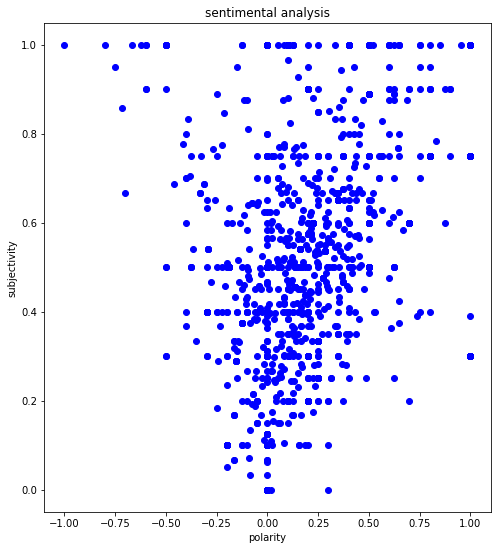

In [43]:
plt.figure(figsize=(8,9))
for i in range (0,tweets.shape[0]):
    plt.scatter(tweets['polarity'][i],tweets['subjectivity'][i],color='blue')
    
plt.title('sentimental analysis')  
plt.xlabel("polarity")
plt.ylabel("subjectivity")
plt.show()